In [180]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [182]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## In the below steps we will read and understand the data

In [185]:
#Importing data
data = pd.read_csv("day.csv")

In [187]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [189]:
data.shape

(730, 16)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### We can see few categorical variables will be creating dummy variables for the same

In [194]:
#mapping months 1-12 to the month name and creating dummy variables for the same
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
data['mnth'] = data['mnth'].map(month_mapping)
monthDummy = pd.get_dummies(data['mnth'], drop_first = True, dtype=int)
data = pd.concat([data, monthDummy], axis = 1)
data.drop(['mnth'], axis = 1, inplace = True)
monthDummy.describe

<bound method NDFrame.describe of      August  December  February  January  July  June  March  May  November  \
0         0         0         0        1     0     0      0    0         0   
1         0         0         0        1     0     0      0    0         0   
2         0         0         0        1     0     0      0    0         0   
3         0         0         0        1     0     0      0    0         0   
4         0         0         0        1     0     0      0    0         0   
..      ...       ...       ...      ...   ...   ...    ...  ...       ...   
725       0         1         0        0     0     0      0    0         0   
726       0         1         0        0     0     0      0    0         0   
727       0         1         0        0     0     0      0    0         0   
728       0         1         0        0     0     0      0    0         0   
729       0         1         0        0     0     0      0    0         0   

     October  September  
0  

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
 15  August      730 non-null    int64  
 16  December    730 non-null    int64  
 17  February    730 non-null    int64  
 18  January     730 non-null    int64  
 19  July        730 non-null    i

In [198]:
#mapping weekday 0-6 to the weekday name and creating dummy variables for the same
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
data['weekday'] = data['weekday'].map(weekday_mapping)
weeDayDummy = pd.get_dummies(data['weekday'],drop_first = True, dtype=int)
data = pd.concat([data, weeDayDummy], axis = 1)
data.drop(['weekday'], axis = 1, inplace = True)
weeDayDummy.describe

<bound method NDFrame.describe of      Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0         0         1       0         0        0          0
1         0         0       1         0        0          0
2         1         0       0         0        0          0
3         0         0       0         0        1          0
4         0         0       0         0        0          1
..      ...       ...     ...       ...      ...        ...
725       0         0       0         1        0          0
726       0         0       0         0        0          0
727       0         1       0         0        0          0
728       0         0       1         0        0          0
729       1         0       0         0        0          0

[730 rows x 6 columns]>

In [200]:
#mapping weather 1-4 to the weather name and creating dummy variables for the same
weather_mapping = {
    1: 'clear',
    2: 'mist',
    3: 'snow',
    4: 'rain',
}
data['weathersit'] = data['weathersit'].map(weather_mapping)
weathersitDummy = pd.get_dummies(data['weathersit'], drop_first = True, dtype=int)
data = pd.concat([data, weathersitDummy], axis = 1)
data.drop(['weathersit'], axis = 1, inplace = True)
weathersitDummy.describe

<bound method NDFrame.describe of      mist  snow
0       1     0
1       1     0
2       0     0
3       0     0
4       0     0
..    ...   ...
725     1     0
726     1     0
727     1     0
728     0     0
729     1     0

[730 rows x 2 columns]>

In [202]:
#mapping seasons 1-4 to the season name and creating dummy variables for the same
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter',
}
data['season'] = data['season'].map(season_mapping)
seasonDummy = pd.get_dummies(data['season'], drop_first = True, dtype=int)
data = pd.concat([data, seasonDummy], axis = 1)
data.drop(['season'], axis = 1, inplace = True)
seasonDummy.describe

<bound method NDFrame.describe of      spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]>

In [204]:
data.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,mist,snow,spring,summer,winter
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,1,0,0,0,0,1,0,1,0,0
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,1,0,0,0,1,0,1,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,1,0,0,0,1,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,1,0,0,1,0,0


### In the below couple of cells will be cleaning up the data and check for any outliners or null values

In [207]:
#Dropping dteday as we will not be using it for regression
data.drop(['dteday'], axis = 1, inplace = True)

In [209]:
data.shape

(730, 33)

In [211]:
#Listing all numeric columns
num_data = data[['temp','atemp','hum','windspeed', 'instant', 'casual', 'registered']]

In [213]:
#Checking for any outliners the value should grow normally
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,temp,atemp,hum,windspeed,instant,casual,registered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,365.500000,849.249315,3658.757534
std,7.506729,8.150308,14.237589,5.195841,210.877136,686.479875,1559.758728
min,2.424346,3.953480,0.000000,1.500244,1.000000,2.000000,20.000000
25%,13.811885,16.889713,52.000000,9.041650,183.250000,316.250000,2502.250000
50%,20.465826,24.368225,62.625000,12.125325,365.500000,717.000000,3664.500000
75%,26.880615,30.445775,72.989575,15.625589,547.750000,1096.500000,4783.250000
90%,29.998347,33.908210,81.762500,19.833997,657.100000,1872.000000,5895.400000
95%,31.520460,35.749975,86.868735,22.999988,693.550000,2355.000000,6280.550000
99%,33.868050,38.941650,92.795857,27.380948,722.710000,2931.680000,6787.390000


In [215]:
#Checking for any null values
data.isnull().sum()

instant       0
yr            0
holiday       0
workingday    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
August        0
December      0
February      0
January       0
July          0
June          0
March         0
May           0
November      0
October       0
September     0
Monday        0
Saturday      0
Sunday        0
Thursday      0
Tuesday       0
Wednesday     0
mist          0
snow          0
spring        0
summer        0
winter        0
dtype: int64

### In the below few steps will scal the data with min-max scaling and split the data to tests and train and visualise it. 

In [218]:
#Split the data into test and train
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [220]:
#Scale the numeric values to min max scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_colums = ['temp','atemp','hum','windspeed', 'instant', 'casual', 'registered', 'cnt']
data_train[num_colums] = scaler.fit_transform(data_train[num_colums])
data_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,mist,snow,spring,summer,winter
653,0.896978,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,...,0,0,0,1,0,0,0,0,0,1
576,0.791209,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,...,0,0,0,1,0,0,0,0,0,0
426,0.585165,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,...,1,0,0,0,0,1,0,1,0,0
728,1.000000,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,...,0,1,0,0,0,0,0,1,0,0
482,0.662088,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,...,1,0,0,0,0,1,0,0,1,0


In [222]:
data_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,mist,snow,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.505414,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412,0.243137,0.245098,0.24902
std,0.288281,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.255838,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.510989,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.759272,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [224]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

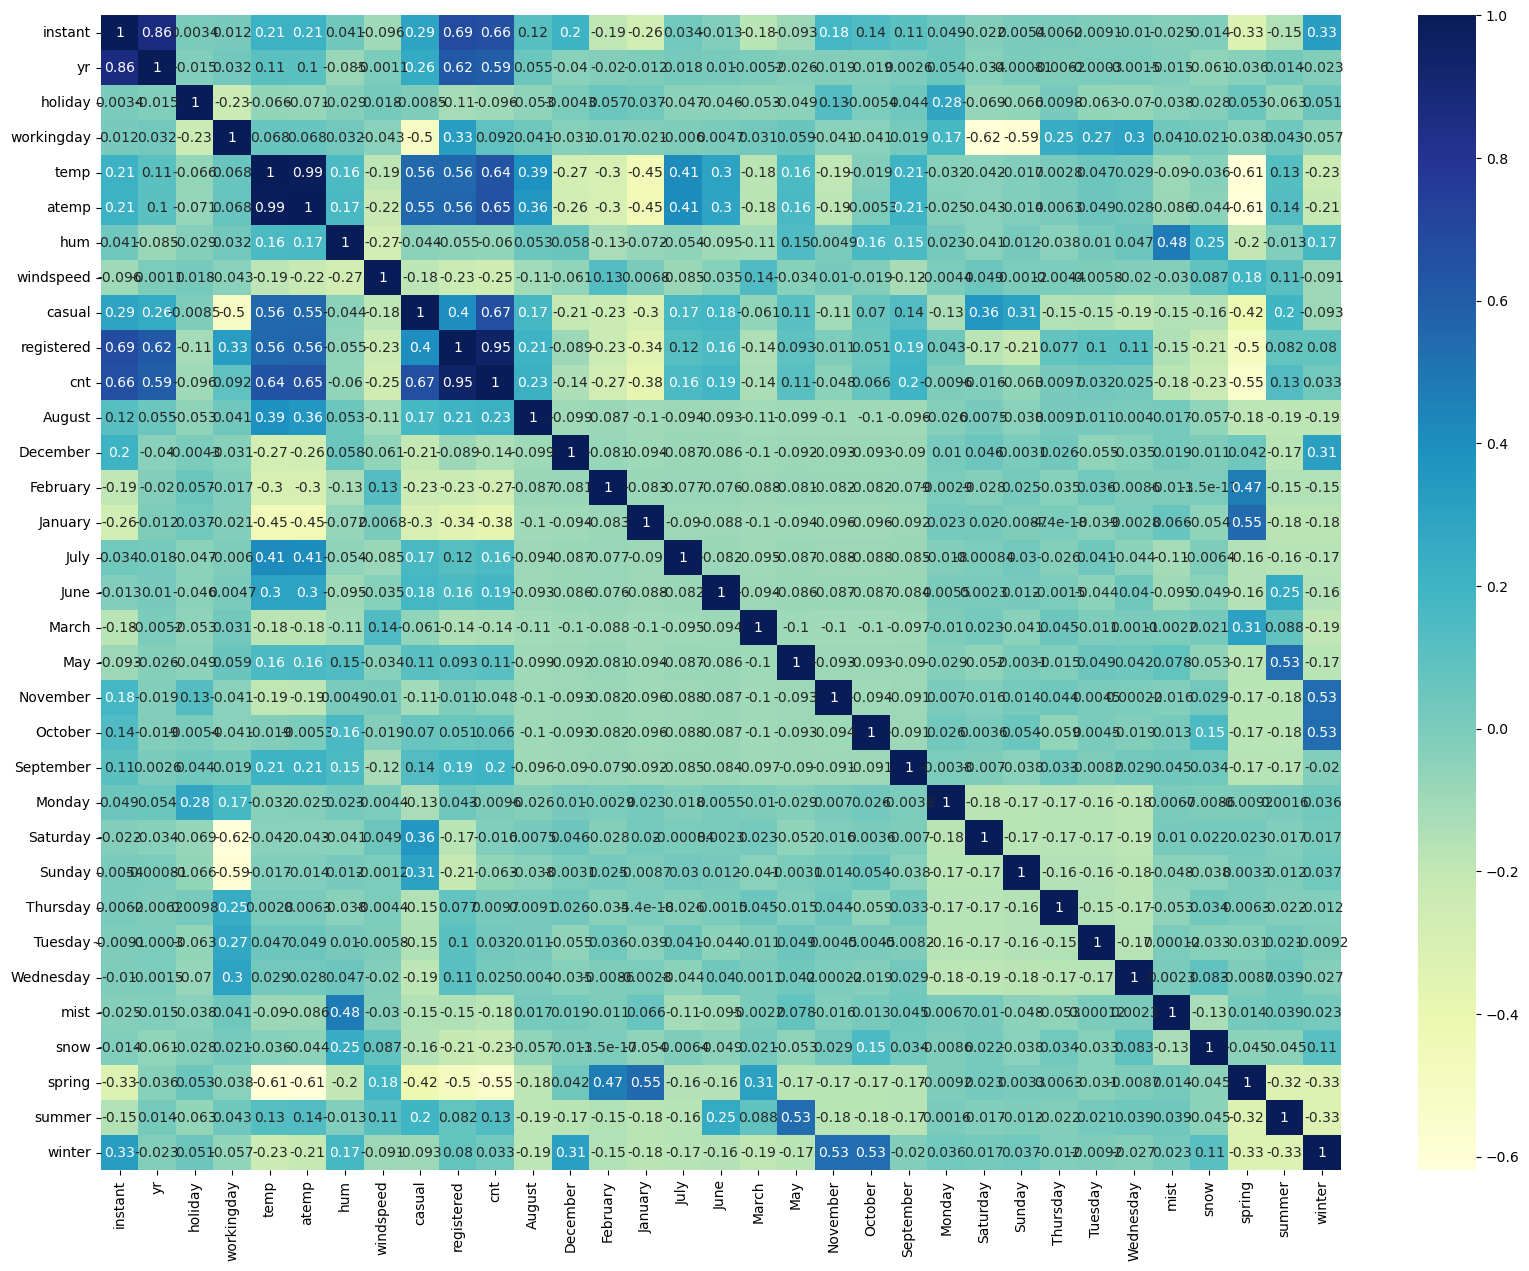

In [226]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

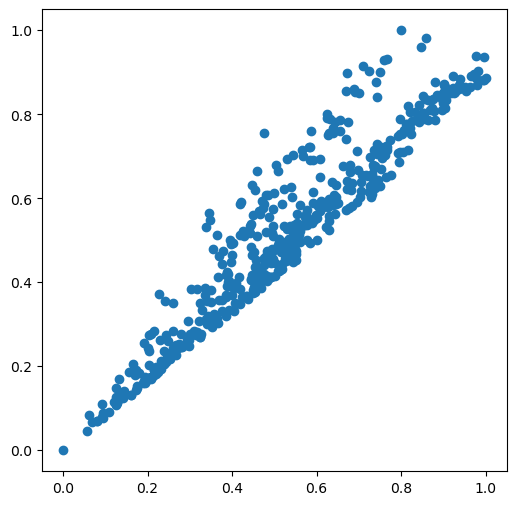

In [227]:
#visualising cnt and registered as they are highly co related
plt.figure(figsize=[6,6])
plt.scatter(data_train.registered, data_train.cnt)
plt.show()

In [230]:
#Removing corelated fields
data_train.drop(['instant','atemp','registered', 'casual'], axis = 1, inplace = True)

In [232]:
#getting y and x value from train data set
y_train = data_train.pop('cnt')
X_train = data_train

In [234]:
X_train.shape

(510, 28)

In [236]:
y_train.shape

(510,)

### In the below few steps will be building the model and anlysing R2, p value and VIF and again build the model till we get the best fit

In [239]:
#Importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [241]:
# Running RFE with variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [243]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('August', False, 7),
 ('December', False, 4),
 ('February', False, 5),
 ('January', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 6),
 ('November', False, 3),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('mist', True, 1),
 ('snow', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [245]:
#Listing insignificant columns
insignificant_col = X_train.columns[rfe.support_]
insignificant_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'September', 'Saturday', 'Sunday', 'mist', 'snow', 'spring', 'summer',
       'winter'],
      dtype='object')

In [247]:
#Getting all significant columns
X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'January', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [249]:
#Training data will now have top 15 significant columns only
X_train_rfe = X_train[insignificant_col]
print(X_train_rfe)

     yr  holiday  workingday      temp       hum  windspeed  July  September  \
653   1        0           1  0.509887  0.575354   0.300794     0          0   
576   1        0           1  0.815169  0.725633   0.264686     1          0   
426   1        0           0  0.442393  0.640189   0.255342     0          0   
728   1        0           0  0.245101  0.498067   0.663106     0          0   
482   1        0           0  0.395666  0.504508   0.188475     0          0   
..   ..      ...         ...       ...       ...        ...   ...        ...   
526   1        0           1  0.824514  0.605840   0.355596     0          0   
578   1        0           1  0.863973  0.679690   0.187140     0          0   
53    0        0           1  0.202618  0.435939   0.111379     0          0   
350   0        0           0  0.248216  0.577930   0.431816     0          0   
79    0        0           1  0.462664  0.759870   0.529881     0          0   

     Saturday  Sunday  mist  snow  spri

In [251]:
#Building the status model with identified significant 15 variables
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        22:20:30   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

In [253]:
#Dropping the variable with high p value
X_train_rfe.drop(['holiday'], axis = 1, inplace = True)

In [255]:
#Re building the model
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        22:20:31   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

In [257]:

X_train_new = X_train_rfe.drop(['const'], axis=1)

In [259]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
7,Saturday,4.91
4,windspeed,4.90
11,spring,4.80
8,Sunday,4.76
13,winter,3.71
12,summer,3.03
9,mist,2.31


In [261]:
#Removing the variable with high vif
X_train_rfe.drop(['hum'], axis = 1, inplace = True)

In [263]:
#Re building the model
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          5.73e-189
Time:                        22:20:34   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

In [265]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
6,Saturday,4.45
7,Sunday,4.21
10,spring,3.82
12,winter,2.80
11,summer,2.75
0,yr,2.07
4,July,1.60


In [267]:
#Removing the variable with high vif
X_train_rfe.drop(['workingday'], axis = 1, inplace = True)

In [269]:
#Re building the model
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.01e-186
Time:                        22:20:36   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.030      6.771      0.0

In [271]:
#Removing the variable with high p value and re building the model
X_train_rfe.drop(['Saturday'], axis = 1, inplace = True)
lm = sm.OLS(y_train, X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          1.65e-187
Time:                        22:20:36   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2036      0.030      6.889      0.0

In [273]:
# Calculate the VIFs for the new model

X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
9,summer,2.22
8,spring,2.09
0,yr,2.07
10,winter,1.80
3,July,1.59
6,mist,1.55
4,September,1.33
5,Sunday,1.17


##### We now have 11 variables with low p value (meaning having significance) and less VIF (meaning less multicollinearity) and good R2 value

### As we can see we have a model with descent R2 value In next few steps we will predict the y value for traing data and visualise the Residual 

In [277]:
#predicting the y value
y_data_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

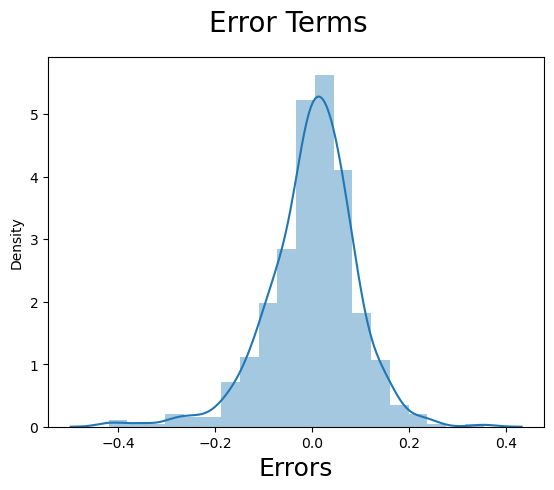

In [279]:
#Ploting the Residual
fig = plt.figure()
sns.distplot(( y_train - y_data_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### We can clearly see the error is normally distributed  with mean as 0

### In next we steps we will scale the test data and predict the y value for the same

In [283]:
#scaling numeric values in test data set
num_colums = ['temp','atemp','hum','windspeed', 'instant', 'casual', 'registered', 'cnt']
data_test[num_colums] = scaler.transform(data_test[num_colums])

In [285]:
y_test = data_test.pop('cnt')
X_test = data_test

In [287]:
X_test_new = X_test[X_train_new.columns]

In [289]:
#adding constant and predicting
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

In [291]:
#Analysing summery
lm = sm.OLS(y_test, X_test_new).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     85.39
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.20e-70
Time:                        22:20:44   Log-Likelihood:                 210.33
No. Observations:                 219   AIC:                            -396.7
Df Residuals:                     207   BIC:                            -356.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2432      0.048      5.043      0.0

In [293]:
## We can clearly see the R2 value of test and train data is almost same.

Text(0, 0.5, 'y_pred')

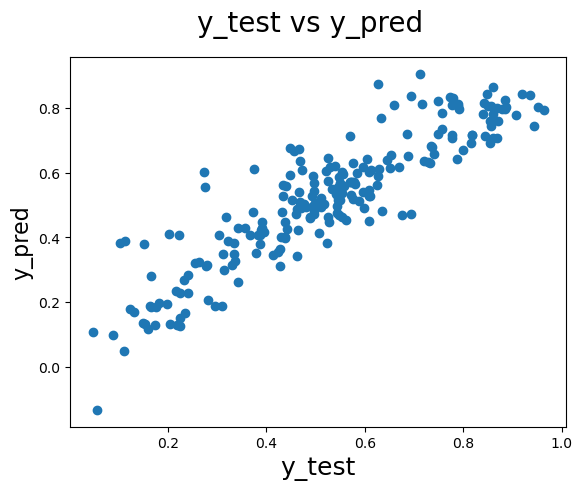

In [295]:
#Ploting predicted and y test value 
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

Text(0.5, 0, 'Errors')

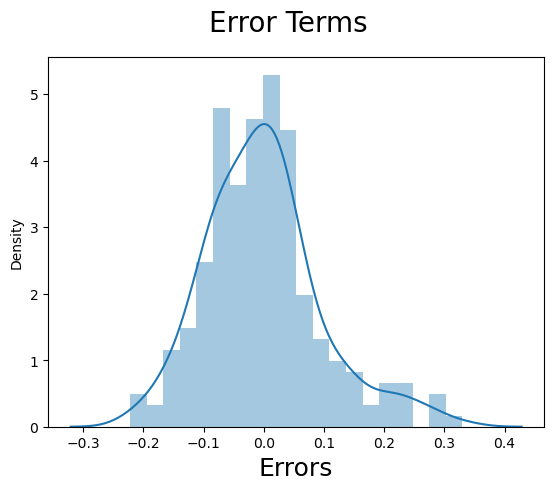

In [297]:
#Visualising Residual for test data set
fig = plt.figure()
sns.distplot(( y_pred - y_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0, 0.5, 'y_pred')

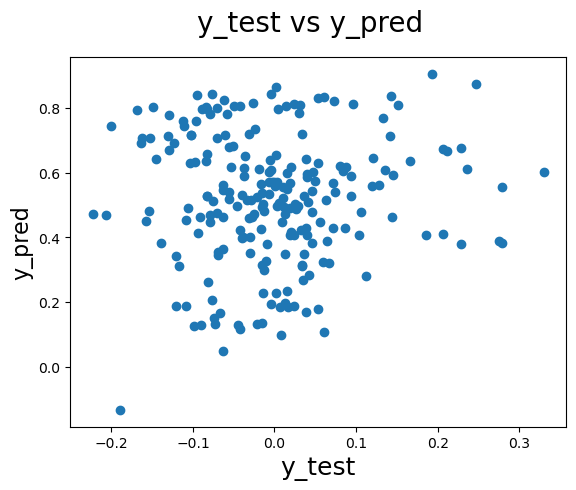

In [299]:
#Residual analysis to confirm linearity
fig = plt.figure()
plt.scatter(y_pred - y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 